Need to perform a detailed analysis on this dataset to uncover insights related to customer behavior, platform performance, product category trends, and payment preferences. 

Columns:

tran_id: A unique identifier for each transaction.

cust_id: Identifier linking the transaction to a specific customer.

tran_date: The date on which the transaction occurred.

tran_amount: The monetary value of the transaction.

platform: The channel used to make the transaction (e.g., web, mobile).

product_category: The category of the product purchased in the transaction.

payment_type: The method of payment used (e.g., credit card, wallet, Cash, UPI).

In [ ]:
# Used to read .ipynb file
!pip install import-ipynb


In [ ]:
#Import Libraries
import import_ipynb
from Customer_Data_Analysis import *
from Credit_Profile_Analysis import *

In [3]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [4]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [5]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [7]:
df_transactions[df_transactions.platform.isnull()].sample(4)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
354225,354226,458,2023-06-25,127,None,Beauty & Personal Care,Phonepe
432260,432261,295,2023-08-03,96,None,Fashion & Apparel,Credit Card
226036,226037,568,2023-04-23,47,None,Toys & Games,Phonepe
5741,5742,299,2023-01-03,71,None,Garden & Outdoor,Credit Card


In [8]:
df_transactions.product_category.value_counts()

product_category
Electronics               134535
Fashion & Apparel         116892
Kitchen Appliances         57353
Beauty & Personal Care     56065
Sports                     49704
Home Decor                 38355
Garden & Outdoor           23644
Books                      13635
Toys & Games                9817
Name: count, dtype: int64

In [10]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [51]:
#Get the mode for each product category based on platform
Trans_Mode = df_transactions.groupby('product_category')['platform'].agg(lambda x: x.mode().iloc[0])
Trans_Mode

product_category
Beauty & Personal Care    Amazon
Books                     Amazon
Electronics               Amazon
Fashion & Apparel         Amazon
Garden & Outdoor          Amazon
Home Decor                Amazon
Kitchen Appliances        Amazon
Sports                    Amazon
Toys & Games              Amazon
Name: platform, dtype: object

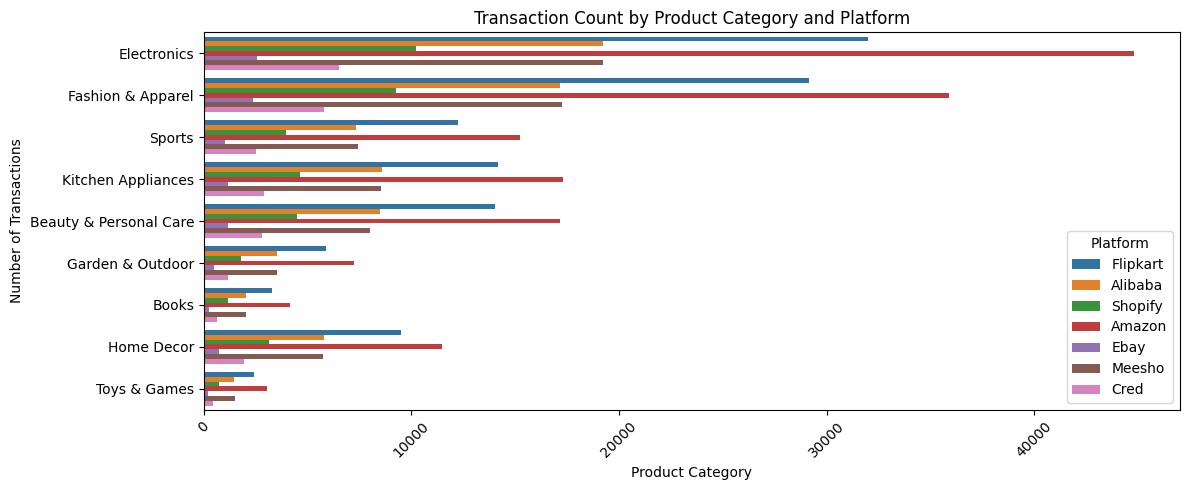

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_transactions, y='product_category', hue='platform')

plt.title('Transaction Count by Product Category and Platform')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

In [42]:
df_transactions.platform.isna().sum()

np.int64(4941)

In [43]:
df_transactions['platform'] = df_transactions.apply(
    lambda row: Trans_Mode[row['product_category']] if pd.isna(row['platform']) else row['platform'],
    axis=1
)

In [44]:
df_transactions.platform.isna().sum()

np.int64(0)

In [52]:
#check for the outliers in the transaction amount
df_transactions.tran_amount.describe()

count    500000.00000
mean       3225.20733
std       13098.74276
min           0.00000
25%          64.00000
50%         141.00000
75%         397.00000
max       69999.00000
Name: tran_amount, dtype: float64

In [55]:
df_trans_zero = df_transactions[df_transactions.tran_amount==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [62]:
df_trans_zero.groupby('platform')[['product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [65]:
df_trans = df_transactions[(df_transactions.platform=='Amazon') & (df_transactions.product_category=='Electronics') & (df_transactions.payment_type=='Credit Card')]
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [67]:
trans_median = df_trans[df_trans.tran_amount>0].tran_amount.median()
trans_median

np.float64(554.0)

In [68]:
df_transactions['tran_amount'].replace(0,trans_median,inplace=True)

In [70]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


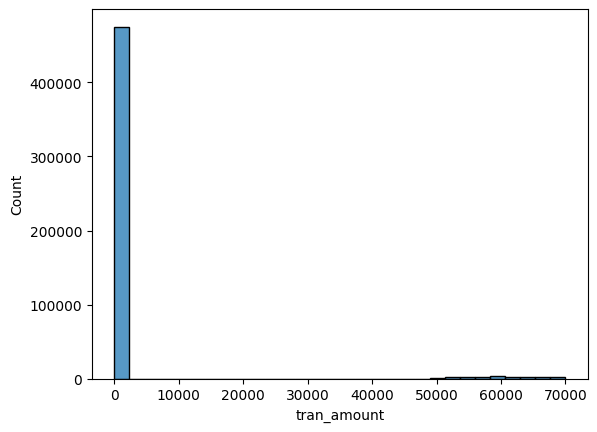

In [72]:
sns.histplot(df_transactions.tran_amount,bins=30)
plt.show()

In [73]:
Q1,Q3 = df_transactions.tran_amount.quantile([0.25,0.75])
Q1,Q3

(66.0, 413.0)

In [75]:
IQR = Q3-Q1
print(IQR)
lower_limit = Q1- IQR*2
print('lower_limit: ',lower_limit)
upper_limit = Q3 + IQR*2
print('upper_limit: ',upper_limit)

347.0
lower_limit:  -628.0
upper_limit:  1107.0


In [77]:
trans_outlier = df_transactions[df_transactions.tran_amount>=upper_limit]
trans_outlier.shape

(25000, 7)

In [79]:
df_trans_normal = df_transactions[df_transactions.tran_amount<upper_limit]
df_trans_normal.shape

(475000, 7)

In [82]:
Category_Mean = df_trans_normal.groupby('product_category')['tran_amount'].mean()
Category_Mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [83]:
df_transactions.loc[trans_outlier.index,'tran_amount']=trans_outlier['product_category'].map(Category_Mean)

In [84]:
df_transactions.loc[trans_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

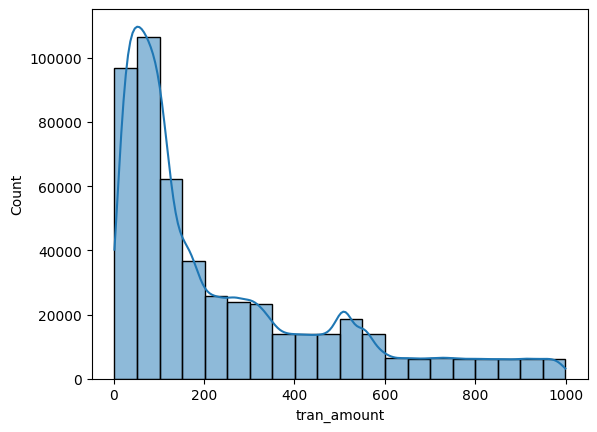

In [86]:
sns.histplot(df_transactions.tran_amount,kde=True,bins=20)

In [87]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


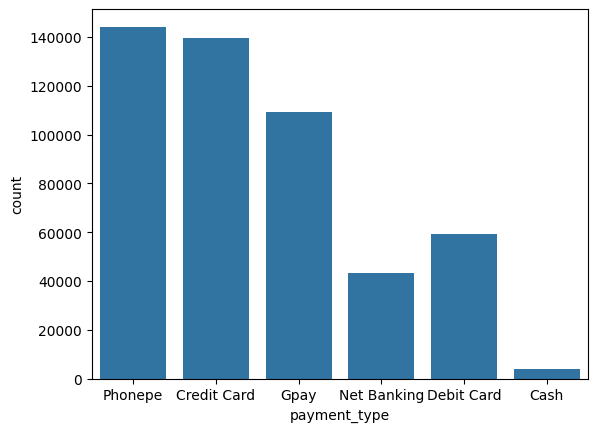

In [89]:
sns.countplot(x=df_transactions.payment_type)
plt.show()

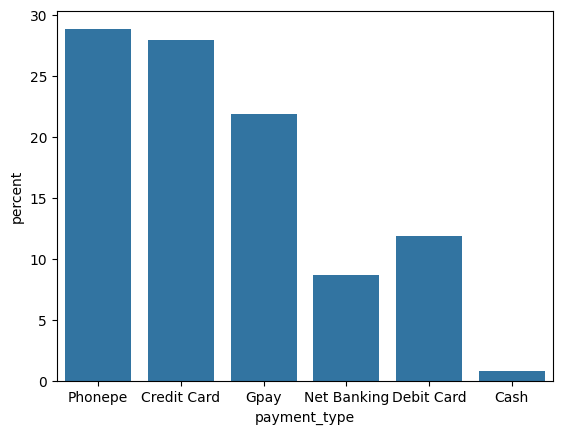

In [90]:
sns.countplot(x=df_transactions.payment_type,stat='percent')
plt.show()

In [92]:
df_customer_transactions = df_transactions.merge(df_customer_credit_profile,on='cust_id',how='inner')
print(df_customer_transactions.shape)  # Rows and columns
print(df_customer_transactions.columns)  # List of all columns after merge

(500000, 22)
Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type', 'name', 'gender', 'age', 'location',
       'occupation', 'annual_income', 'marital_status', 'age_group',
       'credit_score', 'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'credit_limit_mode'],
      dtype='object')


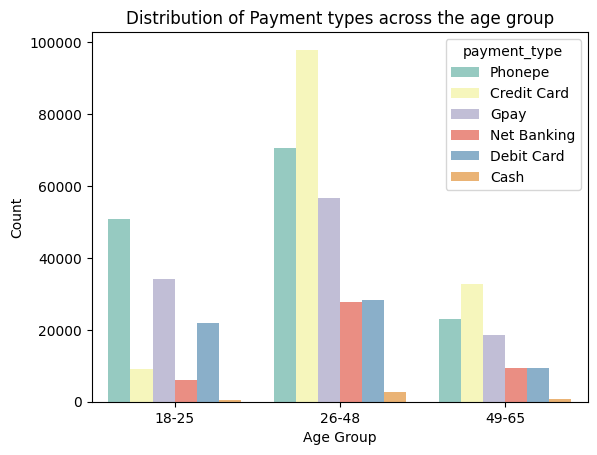

In [99]:
sns.countplot(data=df_customer_transactions, x='age_group', hue='payment_type',palette='Set3')
plt.title('Distribution of Payment types across the age group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

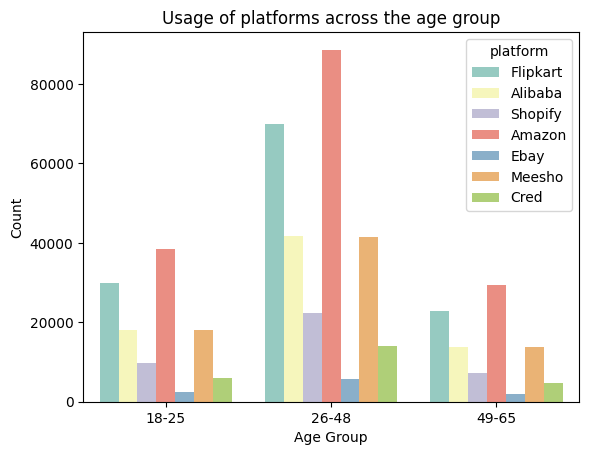

In [100]:
sns.countplot(data=df_customer_transactions, x='age_group', hue='platform',palette='Set3')
plt.title('Usage of platforms across the age group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

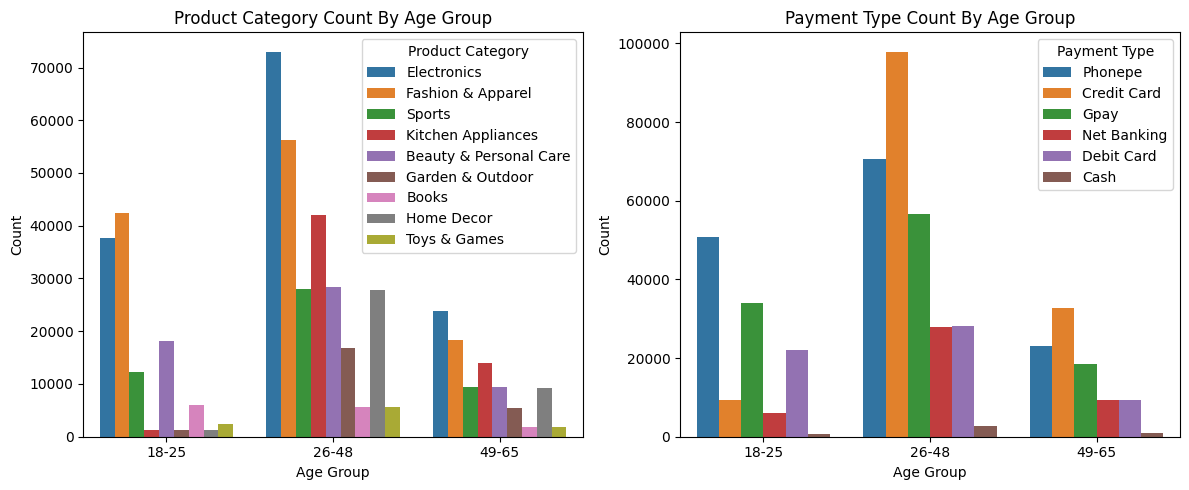

In [103]:
# Create subplots
fig, (ax1 ,ax2) = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='age_group',hue='product_category',data=df_customer_transactions,ax=ax1)
ax1.set_title('Product Category Count By Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title='Product Category', loc='upper right')

sns.countplot(x='age_group', hue='payment_type', data=df_customer_transactions, ax=ax2)
ax2.set_title('Payment Type Count By Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.legend(title='Payment Type', loc='upper right')

plt.tight_layout()
plt.show()

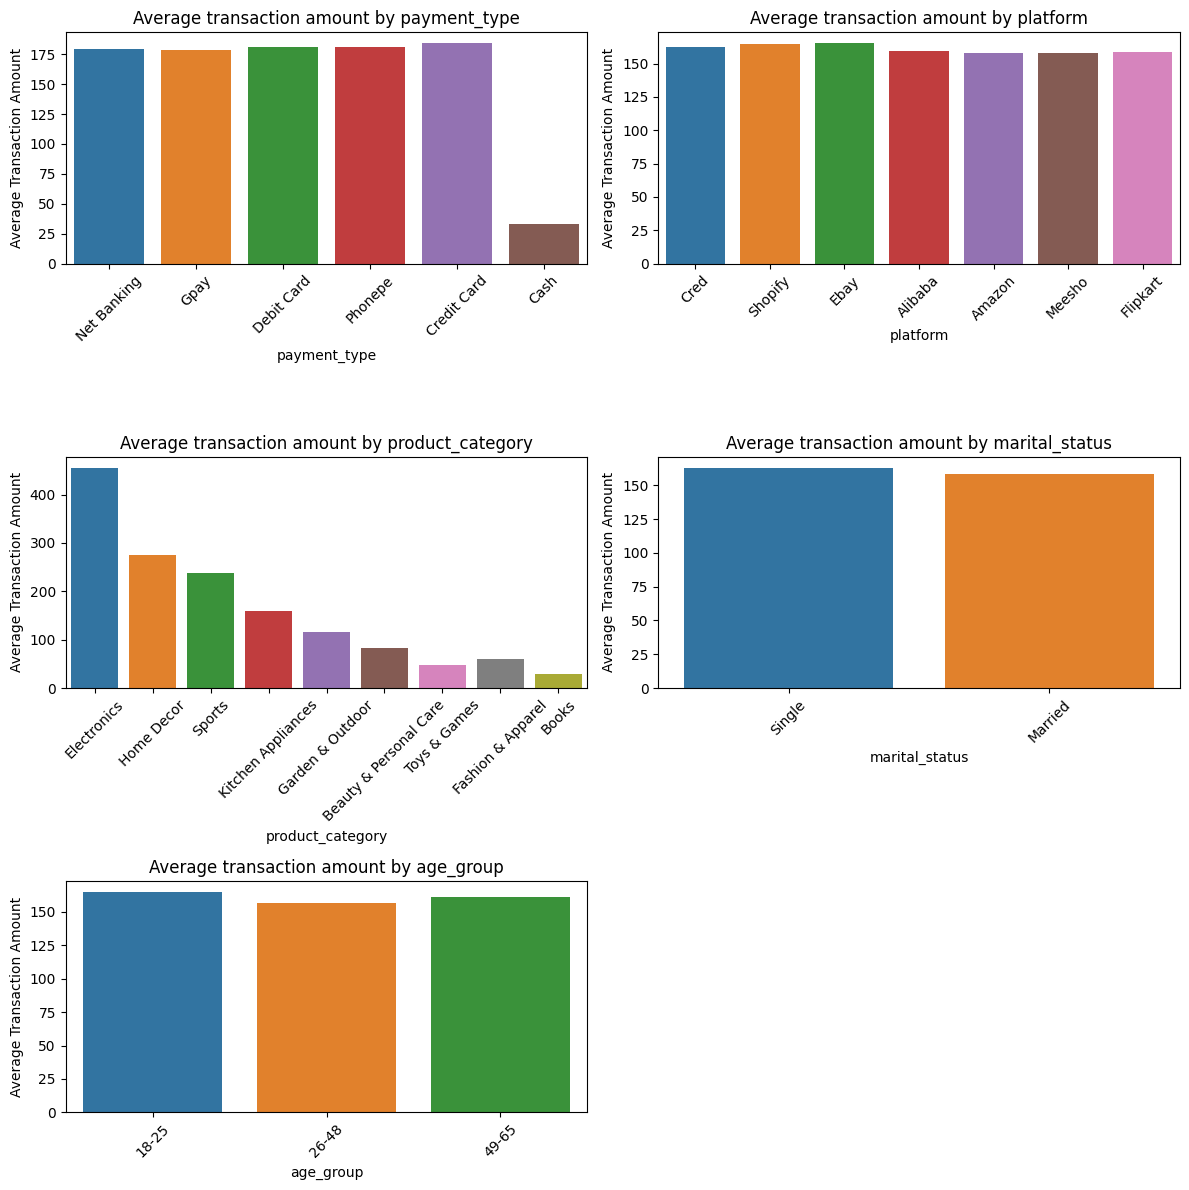

In [112]:
#List of categorical columns
cat_cols = ['payment_type','platform','product_category','marital_status','age_group']
num_rows=3
#create subplots
fig, axes = plt.subplots(num_rows,2,figsize=(12,4*num_rows))

#flatten the axes array to make it easier to itterate
axes = axes.flatten()

#create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    #calculate the average annual income for each category
    avg_tran_amount_by_category = df_customer_transactions.groupby(cat_cols)['tran_amount'].mean().reset_index()

    #sort the data by annual_income before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount',ascending=False)
    sns.barplot(x=cat_col,y='tran_amount',data=sorted_data,ci=None,ax=axes[i],palette="tab10")
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Transaction Amount')

    #Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)

#Hide any unsed subplots
for i in range(len(cat_cols),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [108]:
# Further Analysis on Age Group
age_group_metrics = df_customer_transactions.groupby('age_group')[['annual_income','credit_limit','credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37016.604349,1137.024545,484.708344
1,26-48,145659.948359,20610.301607,597.918043
2,49-65,260051.825464,41781.734465,701.876810


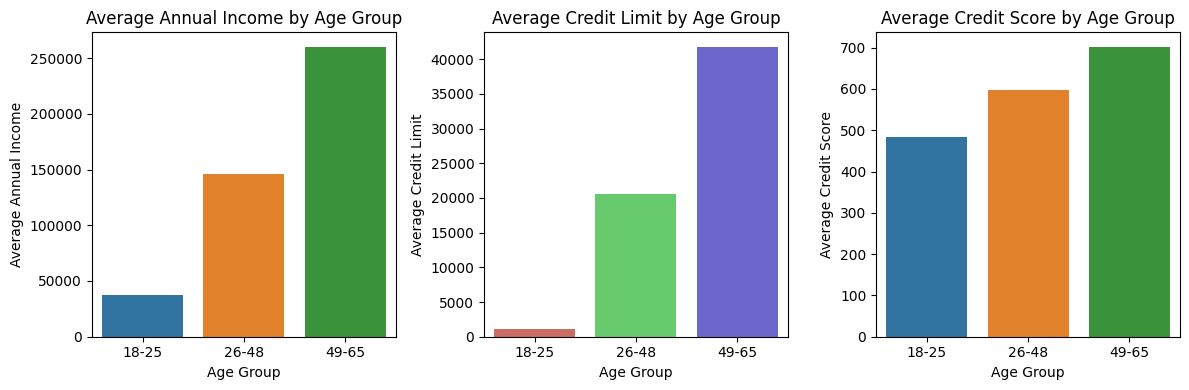

In [109]:
#Create subplots
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4)) 

#plot 1: Average annual income by age group
sns.barplot(x='age_group',y='annual_income',data=age_group_metrics,palette='tab10',ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

#plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group',y='credit_limit',data=age_group_metrics,palette='hls',ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

#plot 3: Average annual income by age group
sns.barplot(x='age_group',y='credit_score',data=age_group_metrics,palette='tab10',ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()